In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import rc
import matplotlib.pyplot as plt

In [9]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='../data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [10]:
# 데이터 불러오기
data = pd.read_csv('../data/merge/mackerel_price.csv')
# '%Y-%m' 형식으로 변환
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.set_index('date',inplace=True)
data

,생산량,가격 (원),갈치,참조기
date,,,,
2008-01-01,7994,2373,1709,285
2008-02-01,1430,2413,819,23
2008-03-01,3001,2436,1027,4
2008-04-01,1385,2510,1740,0
2008-05-01,582,2511,1540,1
...,...,...,...,...
2023-08-01,5698,2932,867,19
2023-09-01,9903,2875,667,61
2023-10-01,9163,2489,1189,119


In [11]:
# 시계열 데이터 선택
ts_data = data['갈치']

# ARIMA 모델 학습
model = sm.tsa.ARIMA(ts_data, order=(50, 1, 0))  # ARIMA(p, d, q)의 각 매개변수 설정
results = model.fit()

c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
# 미래 값 예측
forecast_steps = 15  # 2024년 1월부터 12월까지의 예측
forecast = results.forecast(steps=forecast_steps)

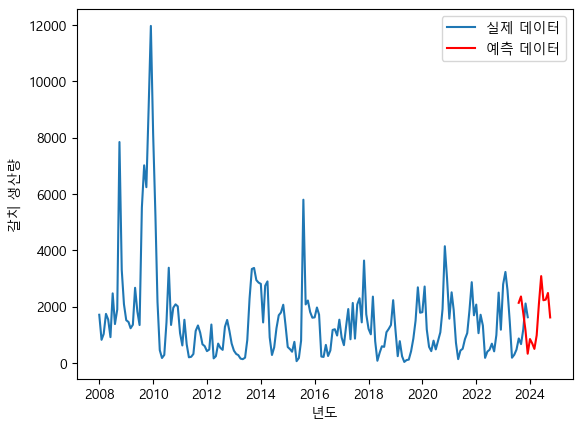

In [13]:
# 예측 결과 시각화
plt.plot(ts_data.index, ts_data, label='실제 데이터')
forecast_index = pd.date_range(start='2023-07-01', periods=forecast_steps, freq='M')
plt.plot(forecast_index, forecast, label='예측 데이터', color='red')
plt.legend()
plt.xlabel('년도')
plt.ylabel('갈치 생산량')
plt.show()

In [14]:
# 2024년 예측값 출력
print("2023~24년 예상 수온(30m) :", forecast)
pd.DataFrame(forecast).rename(columns={'predicted_mean':'갈치'}).to_csv('../data/pred/predict_갈치.csv',encoding='utf-8-sig')

2023~24년 예상 수온(30m) : 2024-01-01    2132.947236
2024-02-01    2358.660455
2024-03-01    1790.544876
2024-04-01    1159.622157
2024-05-01     325.399987
2024-06-01     846.746832
2024-07-01     688.993680
2024-08-01     496.917295
2024-09-01     978.409219
2024-10-01    2087.172052
2024-11-01    3081.842867
2024-12-01    2224.480657
2025-01-01    2244.483777
2025-02-01    2482.869838
2025-03-01    1613.568562
Freq: MS, Name: predicted_mean, dtype: float64
